In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex" : "True",
    "font.family": "Times"
})

from tqdm import tqdm

from scipy.linalg import eigh, norm, expm
from scipy.sparse.linalg import expm_multiply

In [27]:
def time_evol(H,tstart=0,tstop=1,Num=100,N_em=1,psi=[1.]):
    
    n = np.shape(H)[0]-N_em
    psi_in = np.array([0.]*n + psi)

    temp = expm_multiply(-1.j*H,psi_in,tstart,tstop,Num)
    
    return temp[:,-N_em:], temp[:,:-N_em]

In [65]:
N = 200 #number of primitive cells
n = 3*N #number of points

# Hopping terms
t = -1
gam = 1
t1 = t*np.sqrt(gam) 
t2 = t
t3 = t

In [93]:
g = 0.1
om_a = 0

pos = N//2 + N

In [94]:
H = np.zeros((3*N+1,3*N+1))
H += np.diag([t1]*N + [t2]*N+[0],k=N)
H += np.diag([0]*(N+1)+[t3]*(N-1)+[0,0],k=N-1)

H[N,-2] = t3

H[-1,pos] = g
H += np.transpose(np.conjugate(H))
H[-1,-1] = om_a

In [95]:
eigval, eigvect = eigh(H)

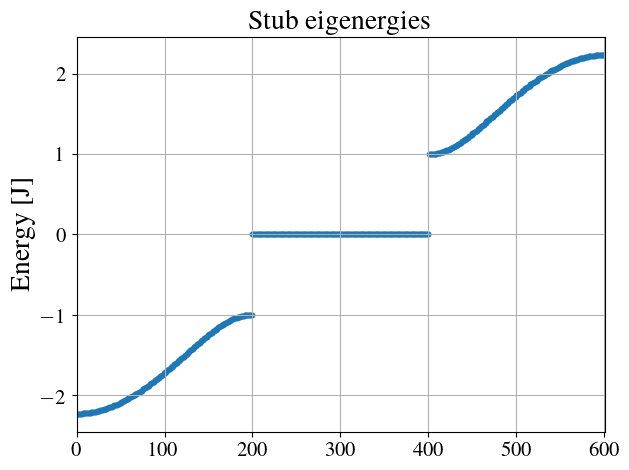

In [96]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(np.arange(len(eigval)),eigval,s=10)

ax.set_title("Stub eigenergies",fontsize=20)
ax.set_ylabel(r"Energy [J]",fontsize=20)

ax.set_xlim(0,len(eigval))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.grid()
#plt.savefig("spectrum_sawtooth.png")
plt.show()

In [20]:
t = np.linspace(0,300,300)
pop, phot = time_evol(H,t[0],t[-1],len(t))

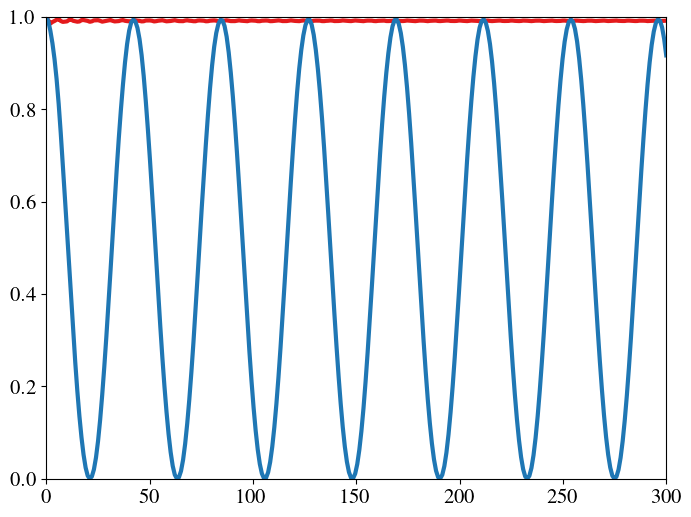

In [100]:
fig = plt.figure(figsize=(8,6))

pop_at = np.real(pop*np.conjugate(pop))
plt.plot(t,pop_at,c='#e41a1c',lw=3,label="Data")
plt.plot(t,pop_at2,lw=3,label="Data")

plt.xlim(0,t[-1])
plt.ylim(0.,1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig("comp_sitesTE.png")
plt.show()

# Two emitters

In [129]:
N = 200 #number of primitive cells
n = 3*N #number of points

# Hopping terms
t = -1
gam = 100
t1 = t*np.sqrt(gam) 
t2 = t
t3 = t

In [130]:
g = 0.1
om_a = 0.5

pos = N//2

In [131]:
H = np.zeros((3*N+2,3*N+2))
H += np.diag([t1]*N + [t2]*N+[0]*2,k=N)
H += np.diag([0]*(N+1)+[t3]*(N-1)+[0,0,0],k=N-1)

H[N,-3] = t3

d = 2
H[-2,pos] = g
H[-1,pos+d] = g
H += np.transpose(np.conjugate(H))
H[-1,-1] = H[-2,-2] = om_a

In [132]:
eigval, eigvect = eigh(H)

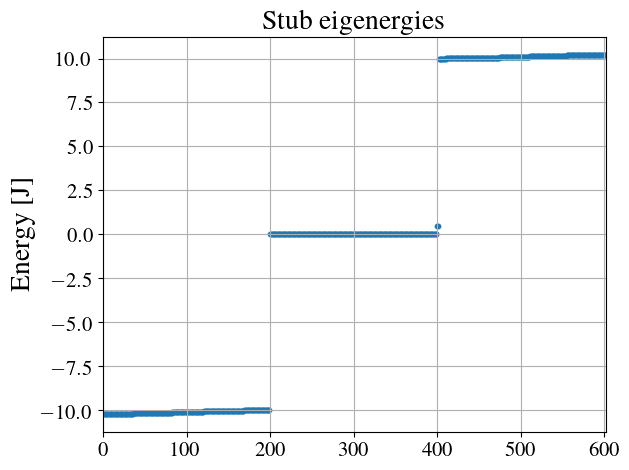

In [133]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(np.arange(len(eigval)),eigval,s=10)

ax.set_title("Stub eigenergies",fontsize=20)
ax.set_ylabel(r"Energy [J]",fontsize=20)

ax.set_xlim(0,len(eigval))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.grid()
#plt.savefig("spectrum_sawtooth.png")
plt.show()

In [134]:
t = np.linspace(0,2000,500)
pop1, phot = time_evol(H,t[0],t[-1],len(t),2,[1.,0.])

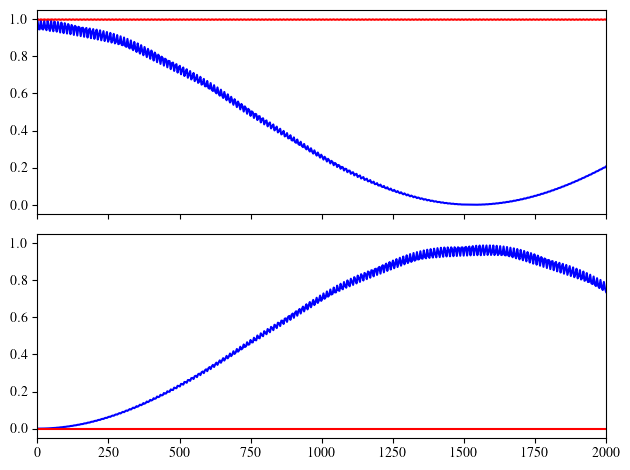

In [146]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True,tight_layout=1)
 
ax[0].plot(t,pop[:,0]*np.conjugate(pop[:,0]),c="blue")
ax[1].plot(t,pop[:,1]*np.conjugate(pop[:,1]),c="blue")

ax[0].plot(t,pop1[:,0]*np.conjugate(pop1[:,0]),c="red")
ax[1].plot(t,pop1[:,1]*np.conjugate(pop1[:,1]),c="red")

ax[0].set_ylim(-0.05,1.05)
ax[1].set_ylim(-0.05,1.05)
ax[0].set_xlim(0,t[-1])

plt.rcParams.update({'font.size': 10})
plt.savefig("two_em.png")
plt.show()